In [ ]:
import pandas as pd
df = pd.read_csv('data_metrics.csv')
df.head()

actual_label  model_RF  model_LR
0             1  0.639816  0.531904
1             0  0.490993  0.414496
2             1  0.623815  0.569883
3             1  0.506616  0.443674
4             0  0.418302  0.369532

In [ ]:
thresh = 0.5
df['predicted_RF'] = (df.model_RF >= 0.5).astype('int')
df['predicted_LR'] = (df.model_LR >= 0.5).astype('int')
df.head()

actual_label  model_RF  model_LR  predicted_RF  predicted_LR
0             1  0.639816  0.531904             1             1
1             0  0.490993  0.414496             0             0
2             1  0.623815  0.569883             1             1
3             1  0.506616  0.443674             1             0
4             0  0.418302  0.369532             0             0

In [6]:
from sklearn.metrics import confusion_matrix
confusion_matrix(df.actual_label.values, df.predicted_RF.values)

array([[5519, 2360],
       [2832, 5047]])

In [9]:
from sklearn.metrics import confusion_matrix

def yakusevych_confusion_matrix():
    TP = 5047
    FP = 2360
    FN = 2832
    TN = 5519

    confusion_matrix = [[TP, FP],
                        [FN, TN]]
    return confusion_matrix

matrix = yakusevych_confusion_matrix()
print("Confusion Matrix:", matrix, "\n")

confusion_matrix(df.actual_label.values, df.predicted_RF.values)

Confusion Matrix: [[5047, 2360], [2832, 5519]] 



array([[5519, 2360],
       [2832, 5047]])

In [8]:
def find_TP(y_true, y_pred):
# counts the number of true positives (y_true = 1, y_pred = 1)
  return sum((y_true == 1) & (y_pred == 1))
def find_FN(y_true, y_pred):
# counts the number of false negatives (y_true = 1, y_pred = 0)
  return sum((y_true == 1) & (y_pred == 0))
def find_FP(y_true, y_pred):
# counts the number of false positives (y_true = 0, y_pred = 1)
  return sum((y_true == 0) & (y_pred == 1))
def find_TN(y_true, y_pred):
# counts the number of true negatives (y_true = 0, y_pred = 0)
  return sum((y_true == 0) & (y_pred == 0))

print('TP:',find_TP(df.actual_label.values, df.predicted_RF.values))
print('FN:',find_FN(df.actual_label.values, df.predicted_RF.values))
print('FP:',find_FP(df.actual_label.values, df.predicted_RF.values))
print('TN:',find_TN(df.actual_label.values, df.predicted_RF.values))

TP: 5047
FN: 2832
FP: 2360
TN: 5519


In [11]:
import numpy as np
def find_conf_matrix_values(y_true,y_pred):
# calculate TP, FN, FP, TN
  TP = find_TP(y_true,y_pred)
  FN = find_FN(y_true,y_pred)
  FP = find_FP(y_true,y_pred)
  TN = find_TN(y_true,y_pred)
  return TP,FN,FP,TN

def my_confusion_matrix(y_true, y_pred):
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return np.array([[TN,FP],[FN,TP]])

my_confusion_matrix(df.actual_label.values, df.predicted_RF.values)

assert np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_RF.values), confusion_matrix(df.actual_label.values, df.predicted_RF.values)), 'my_confusion_matrix() is not correct for RF'
assert np.array_equal(my_confusion_matrix(df.actual_label.values, df.predicted_LR.values),confusion_matrix(df.actual_label.values, df.predicted_LR.values) ), 'my_confusion_matrix() is not correct for LR'

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(df.actual_label.values, df.predicted_RF.values)

0.6705165630156111

In [20]:
def my_accuracy_score(y_true, y_pred):
# calculates the fraction of samples
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP + TN) / (TP + TN + FP + FN)
assert my_accuracy_score(df.actual_label.values, df.predicted_RF.values) == accuracy_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_accuracy_score(df.actual_label.values, df.predicted_LR.values) == accuracy_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Accuracy RF:%.3f'%(my_accuracy_score(df.actual_label.values,df.predicted_RF.values)))
print('Accuracy LR:%.3f'%(my_accuracy_score(df.actual_label.values,df.predicted_LR.values)))

Accuracy RF:0.671
Accuracy LR:0.616


In [21]:
from sklearn.metrics import recall_score
recall_score(df.actual_label.values, df.predicted_RF.values)

0.6405635232897576

In [22]:
def my_recall_score(y_true, y_pred):
# calculates the fraction of positive samples predicted correctly
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP) / (TP + FN)
my_recall_score(df.actual_label.values, df.predicted_RF.values) == recall_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_recall_score(df.actual_label.values, df.predicted_LR.values) == recall_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))

Recall RF: 0.641


In [23]:
from sklearn.metrics import precision_score
precision_score(df.actual_label.values, df.predicted_RF.values)

0.681382476036182

In [25]:
def my_precision_score(y_true, y_pred):
# calculates the fraction of predicted positives samples that are actually positive
  TP,FN,FP,TN = find_conf_matrix_values(y_true,y_pred)
  return (TP) / (TP + FP)
my_precision_score(df.actual_label.values, df.predicted_RF.values) == precision_score(df.actual_label.values, df.predicted_RF.values), 'my_accuracy_score failed on RF'
assert my_precision_score(df.actual_label.values, df.predicted_LR.values) == precision_score(df.actual_label.values, df.predicted_LR.values), 'my_accuracy_score failed on LR'
print('Precision RF:%.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))

Precision RF:0.681


In [26]:
from sklearn.metrics import f1_score
f1_score(df.actual_label.values, df.predicted_RF.values)

0.660342797330891

In [34]:
def my_f1_score(y_true, y_pred):
# calculates the F1 score
  recall = my_recall_score(y_true,y_pred)
  precision = my_precision_score(y_true,y_pred)
  return 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
assert np.isclose(my_f1_score(df.actual_label.values, df.predicted_RF.values), f1_score(df.actual_label.values, df.predicted_RF.values), atol=1e-6), 'my_f1_score failed on RF'
assert np.isclose(my_f1_score(df.actual_label.values, df.predicted_LR.values), f1_score(df.actual_label.values, df.predicted_LR.values), atol=1e-6), 'my_f1_score failed on LR'
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 LR: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_LR.values)))

F1 RF: 0.660
F1 LR: 0.586


In [42]:
print('scores with threshold = 0.5')
print('Accuracy RF:%.3f'%(my_accuracy_score(df.actual_label.values, df.predicted_RF.values)))
print('Recall RF:%.3f'%(my_recall_score(df.actual_label.values, df.predicted_RF.values)))
print('Precision RF:%.3f'%(my_precision_score(df.actual_label.values, df.predicted_RF.values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, df.predicted_RF.values)))
print('')
print('scores with threshold = 0.10')
print('Accuracy RF:%.3f'%(my_accuracy_score(df.actual_label.values, (df.model_RF >= 0.10).astype('int').values)))
print('Recall RF: %.3f'%(my_recall_score(df.actual_label.values, (df.model_RF >= 0.10).astype('int').values)))
print('Precision RF:%.3f'%(my_precision_score(df.actual_label.values, (df.model_RF>= 0.10).astype('int').values)))
print('F1 RF: %.3f'%(my_f1_score(df.actual_label.values, (df.model_RF >= 0.10).astype('int').values)))

scores with threshold = 0.5
Accuracy RF:0.671
Recall RF:0.641
Precision RF:0.681
F1 RF: 0.660

scores with threshold = 0.10
Accuracy RF:0.500
Recall RF: 1.000
Precision RF:0.500
F1 RF: 0.667


In [46]:
from sklearn.metrics import roc_curve
fpr_RF, tpr_RF, thresholds_RF = roc_curve(df.actual_label.values, df.model_RF.values)
fpr_LR, tpr_LR, thresholds_LR = roc_curve(df.actual_label.values, df.model_LR.values)

In [47]:
thresholds_RF

array([       inf, 0.93052053, 0.82363091, ..., 0.25654616, 0.25587275,
       0.17142947])

In [48]:
fpr_RF

array([0.       , 0.       , 0.       , ..., 0.9941617, 0.9941617,
       1.       ])

In [49]:
tpr_RF

array([0.00000000e+00, 1.26919660e-04, 5.33062571e-03, ...,
       9.99873080e-01, 1.00000000e+00, 1.00000000e+00])

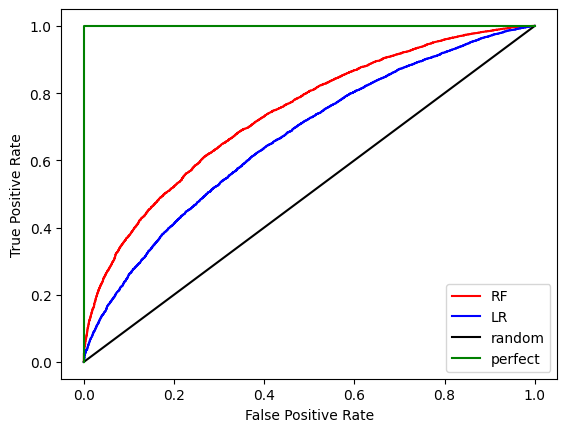

In [51]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF')
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR')
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
auc_RF = roc_auc_score(df.actual_label.values, df.model_RF.values)
auc_LR = roc_auc_score(df.actual_label.values, df.model_LR.values)
print('AUC RF:%.3f'% auc_RF)
print('AUC LR:%.3f'% auc_LR)

AUC RF:0.738
AUC LR:0.666


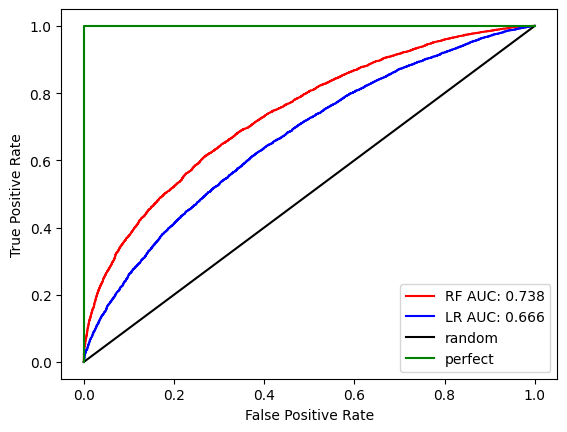

In [53]:
import matplotlib.pyplot as plt
plt.plot(fpr_RF, tpr_RF,'r-',label = 'RF AUC: %.3f'%auc_RF)
plt.plot(fpr_LR,tpr_LR,'b-', label= 'LR AUC: %.3f'%auc_LR)
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()